# Final Exam Second Semester 2567 - K-Means (Gene Problem)


This exam problem has an objective to develop a K-Means algorithm to group gene data into K clusters according to 24 features.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# library written for this exam
import utilsKMeans as utils

%load_ext autoreload
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import random 
random.seed(10)

### We start the exam by first loading the dataset. 

In [18]:
# Load the dataset into the variable X 
data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\KMeans_GeneData.txt')
X = data

m = X.shape[0] # number of training examples

In [19]:
X.shape

(4381, 23)

In [20]:
print(m)

4381


### Set initial centroids

In [21]:
# Initial centroids
# For consistency, here we set centroids to specific values
# but in practice you should generate them automatically, such as by
# settings them to be random examples.

initial_centroids = np.array([[ 1.044925,  1.081155,  1.237512,  0.942651, -1.48274 ,  1.484046,
        -0.065692,  1.304559, -2.093978,  1.026203, -1.32652 , -0.165827,
        -1.549762,  0.578747, -1.084911,  0.896802, -1.232742,  1.42739 ,
        -1.125115, -0.421283, -2.254676,  1.141063,  1.04668 ],
       [-1.279754, -1.447508, -0.798198,  0.291282,  1.107682, -0.021516,
         0.658024, -0.009768,  0.183082, -0.257004, -0.505805, -0.926786,
         1.106628,  0.171252,  0.736144, -0.01826 ,  0.678256, -0.043136,
         0.862963,  0.214295,  0.5267  , -0.254257, -0.006689],
       [ 0.155762,  0.161641,  0.060401, -0.084508, -0.281726, -0.774297,
        -0.765285, -0.430353, -1.80417 , -0.417405, -0.505805,  0.707866,
        -0.071205,  1.743017,  0.736144, -0.35101 , -0.370463, -0.735147,
        -0.358877,  1.803241,  0.48639 ,  0.465205,  0.475577],
       [-0.026355,  0.642296,  0.351216, -0.134613, -0.258177, -0.539053,
        -0.017445, -0.956084, -0.334431, -1.29961 ,  0.561125, -0.757684,
         0.705663,  0.375   ,  1.985472, -0.101448,  0.398598, -0.129637,
        -0.089658,  1.207386, -0.219031,  0.247186,  0.044076]])

In [22]:
def findClosestCentroids(X, centroids): 
    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(idx.size):
        J = np.sqrt(np.sum(np.square(X[i] - centroids),axis = 1))
        idx[i] = np.argmin(J)
        
    return idx

In [23]:
K = 4  #กำหนดให้ในห้อง
initial_centroids = initial_centroids
# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)
print(idx)
print(idx[:3])

[3 1 2 ... 1 0 0]
[3 1 2]


In [24]:
#computing centroids mean
def computeCentroids(X, idx, K): 
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
    return centroids

In [25]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids:')
print(centroids)

Centroids computed after initial finding of closest centroids:
[[ 7.06219758e-01  6.80051047e-01  7.75312048e-01  5.87345177e-01
  -6.06515911e-01  7.93689439e-01 -3.55946523e-01  6.73714351e-01
  -7.15706443e-01  6.47811606e-01 -6.74033022e-01  1.06695012e-01
  -9.81013207e-01  1.47204382e-01 -9.37929666e-01  7.79572781e-01
  -7.74460803e-01  7.02520688e-01 -1.10275844e+00 -3.79419695e-01
  -1.10675920e+00  6.13734935e-01  5.58574154e-01]
 [-6.41224485e-01 -6.26331001e-01 -4.87315099e-01 -1.30738613e-01
   4.93184177e-01  7.38372933e-02  4.69799296e-01  1.26236140e-01
   5.89255182e-01 -1.86469872e-01  7.87985311e-02 -2.60289952e-01
   3.05057545e-01 -3.23402518e-01  2.31566723e-01 -1.47871731e-01
   4.75694646e-01  6.10570171e-03  6.29452409e-01 -1.27214121e-01
   4.07534547e-01 -4.22397021e-01 -4.10257707e-01]
 [ 3.11450755e-01  2.56526329e-01  1.45890708e-02 -2.81132196e-01
  -6.08490625e-01 -4.86802619e-01 -7.61928323e-01 -3.48130016e-01
  -6.04849826e-01  4.18838466e-01  1.054325

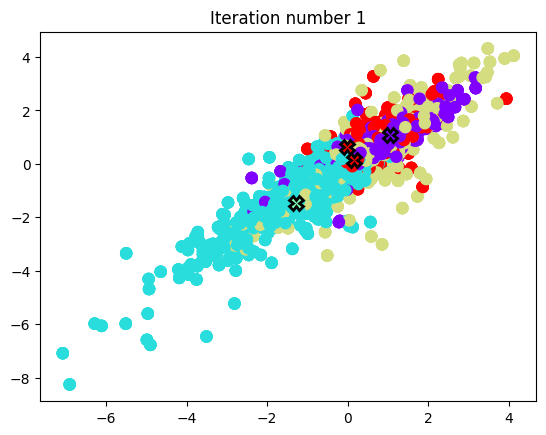

In [27]:
#K-means on example dataset
# Load an example dataset

data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\KMeans_GeneData.txt')
X = data
# Settings for running K-Means
K = 2 #change
max_iters = 100 #change

# For consistency, here we set centroids to specific values
initial_centroids = initial_centroids 

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

Randomize

In [28]:
#Randomize initialization
def kMeansInitCentroids(X, K):
    m, n = X.shape
    # You should return this values correctly
    centroids = np.zeros((K, n))
    randidx = np.random.permutation(X.shape[0]) 
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    return centroids

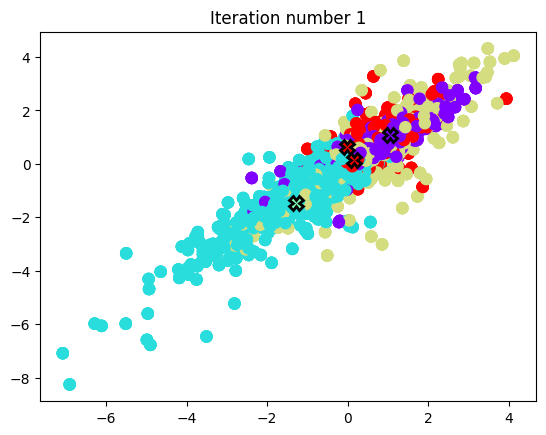

In [29]:
#K-means on example dataset
# Load an example dataset

data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\KMeans_GeneData.txt')
X = data
# Settings for running K-Means
K = 3 #change
max_iters = 100 #change

# For consistency, here we set centroids to specific values
initial_centroids = initial_centroids 

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

In [31]:
print(centroids)

[[ 6.81001437e-01  6.86854381e-01  7.46096174e-01  5.26335780e-01
  -5.26099122e-01  5.95320705e-01 -4.29505855e-01  4.56441767e-01
  -7.08737264e-01  5.22483226e-01 -5.56469831e-01  1.58793596e-01
  -7.79318372e-01  2.30594076e-01 -7.45979516e-01  6.51148767e-01
  -7.27735119e-01  5.25233848e-01 -1.00109750e+00 -2.60813193e-01
  -9.28305774e-01  5.76807202e-01  5.30366724e-01]
 [-5.00089718e-01 -5.43867415e-01 -5.95606121e-01 -4.25502260e-01
   6.84738392e-01 -5.14564600e-01  7.19827639e-01 -3.69233220e-01
   7.75951370e-01 -6.86127426e-01  5.25645297e-01 -3.51562285e-01
   6.51913971e-01 -3.74247697e-01  7.89775569e-01 -6.68759494e-01
   7.09859485e-01 -5.43105781e-01  9.67640569e-01  2.74079858e-01
   8.71774837e-01 -8.47931656e-01 -8.12568199e-01]
 [-8.90819375e-01 -1.08879969e+00 -1.36142049e+00 -1.15764644e+00
  -1.00969798e+00 -5.86288627e-01 -6.68693433e-01 -5.13885833e-02
  -3.55055060e-02  7.18874317e-01  2.23394062e-01  3.05018478e-01
  -1.16751371e-01 -6.01580992e-02 -3.037

In [32]:
print(initial_centroids)

[[ 1.044925  1.081155  1.237512  0.942651 -1.48274   1.484046 -0.065692
   1.304559 -2.093978  1.026203 -1.32652  -0.165827 -1.549762  0.578747
  -1.084911  0.896802 -1.232742  1.42739  -1.125115 -0.421283 -2.254676
   1.141063  1.04668 ]
 [-1.279754 -1.447508 -0.798198  0.291282  1.107682 -0.021516  0.658024
  -0.009768  0.183082 -0.257004 -0.505805 -0.926786  1.106628  0.171252
   0.736144 -0.01826   0.678256 -0.043136  0.862963  0.214295  0.5267
  -0.254257 -0.006689]
 [ 0.155762  0.161641  0.060401 -0.084508 -0.281726 -0.774297 -0.765285
  -0.430353 -1.80417  -0.417405 -0.505805  0.707866 -0.071205  1.743017
   0.736144 -0.35101  -0.370463 -0.735147 -0.358877  1.803241  0.48639
   0.465205  0.475577]
 [-0.026355  0.642296  0.351216 -0.134613 -0.258177 -0.539053 -0.017445
  -0.956084 -0.334431 -1.29961   0.561125 -0.757684  0.705663  0.375
   1.985472 -0.101448  0.398598 -0.129637 -0.089658  1.207386 -0.219031
   0.247186  0.044076]]


In [84]:
#i in X (recall data)
#centroid from initial
def distortion(data, centroids):
    J = []
    m = len(X)
    for i in data:
        distances = (1/m)*np.linalg.norm(i - centroids, axis=1)**2
        min_dis = np.min(distances)
        min_dis = np.mean(min_dis)
        J.append(min_dis)  
    return np.array(J)


In [85]:
distortion(X,initial_centroids)

array([0.00290139, 0.00519756, 0.00497349, ..., 0.00758848, 0.01969631,
       0.0143476 ])

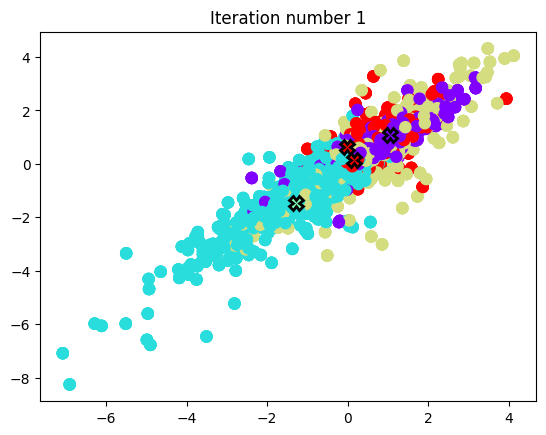

In [75]:
#K-means on example dataset
# Load an example dataset

data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\KMeans_GeneData.txt')
X = data
# Settings for running K-Means
K = 4 #change
max_iters = 50 #change

# For consistency, here we set centroids to specific values
initial_centroids = initial_centroids 

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

In [76]:
print(centroids)

[[ 0.68546476  0.68833801  0.74724089  0.52662806 -0.52493115  0.59726635
  -0.42484654  0.45664548 -0.70801993  0.52018668 -0.56114202  0.15539708
  -0.7839531   0.22663659 -0.7375993   0.65073631 -0.7145866   0.52127025
  -0.99231914 -0.26230118 -0.92727618  0.56781856  0.51806204]
 [-0.49808051 -0.54355317 -0.60301982 -0.43929088  0.68323605 -0.51685948
   0.72084286 -0.36845013  0.77720323 -0.67976368  0.52737774 -0.35004974
   0.65051257 -0.37829722  0.78782548 -0.67181876  0.70923672 -0.54514939
   0.96768043  0.27279355  0.87396764 -0.84350486 -0.8084227 ]
 [-0.88550983 -1.07924166 -1.34812599 -1.14505396 -1.00670097 -0.57998928
  -0.67567492 -0.04811139 -0.04120068  0.71718948  0.21684455  0.30192131
  -0.12255915 -0.05461168 -0.31218821  0.00428325 -0.27861939  0.42825215
   0.03349651  0.69176097  0.37478467  1.2924743   1.38404625]
 [ 0.13023512  0.21890336  0.30116736  0.28241037  0.22143654  0.1095011
   0.02347011 -0.05701968 -0.01365507 -0.13049812 -0.02895341  0.0323027

In [77]:
distortion(X,centroids)

array([0.00224339, 0.00191729, 0.0010625 , ..., 0.00662699, 0.01483447,
       0.0094803 ])